### Here, we not going to us any special key to encrypt the image rather we are going to jumble up the pixel values of the image in random fashion to encrypt the image.  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

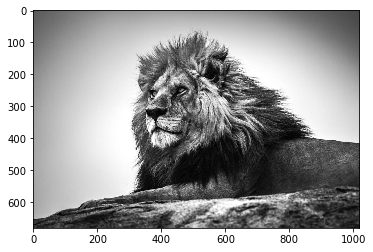

In [2]:
img= cv2.imread('lion.jpg',0)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [3]:
h= img.shape[0]
w=img.shape[1]
key=[]
encimg = np.zeros(shape=[h,w,3], dtype= np.uint8)
decimg = np.zeros(shape=[h,w,3], dtype= np.uint8)
enimg  = np.zeros(shape=[h,w,3], dtype= np.uint8)

In [4]:
# img = mpimg.imread('lion.jpg')
# plt.imshow(img)
# plt.show()

def keygen(x,r,size):
#here x define the initial conditions, r defines the control parameter and size defines the number of keys required
    for i in range(size):
        x=r*x*(1-x)
        key.append(int((x*pow(10,16))%256))
    return key
keyconfusion = keygen(0.01,3.95,h*w)

In [5]:
def indexgen(x,r,n):
    index =[]
    k=[]
    
    for i in range(n):
        x = r*x*(1-x)
        k.append(x)
        index.append(i)

    for i in range(n):
        for j in range(n):
            if(k[i]>k[j]):
                # rearranging in ascending order
                k[i], k[j] = k[j], k[i]
                # correspondingly changing the index value in accordance with key values
                index[i], index[j] = index[j], index[i]
    return index

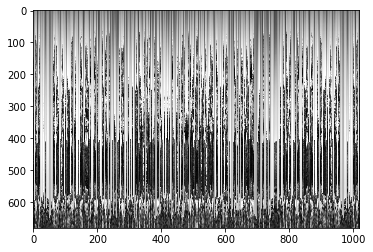

In [6]:
def shufflingcolumn(img, index, x, y):
# x, y are dimensions of the image
    for i in range(x):
        k=0
        for j in range(y):
            encimg[i][j]= img[i][index[k]]
            k=k+1
    return encimg

#column-wise shuffling[columns are picked up and moved entirely]
key = indexgen(0.1,3.91,w)
encimg1 = shufflingcolumn(img,key,h, w)

plt.imshow(encimg1)
plt.show()

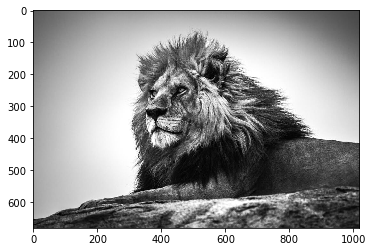

In [10]:
def reshufflingcolumnwise(img,index, x ,y):
    for i in range(x):
        k=0
        for j in range(y):
            decimg[i][index[k]] = img[i][j]
            k=k+1
    return decimg


# columnwise reshuffling
key = indexgen(0.1,3.91,w)
decimg1 = reshufflingcolumnwise(encimg1, key, h, w)
plt.imshow(decimg1)
plt.show()

In [7]:
# # substitution = xor ing pixel values with the key to get encrypted image
# z=0
# for i in range(h):
#     for j in range(w):
#         enimg[i,j] = encimg1[i,j]^keyconfusion[z]
#         z+=1

# plt.imshow(enimg)
# plt.show()

In [8]:
# #key = keygen(0.01,3.95,h*w)
# z=0
# decimg =  np.zeros(shape=[h,w,3], dtype = np.uint8)
# for i in range(h):
#     for j in range(w):
#         decimg[i,j] = enimg[i,j]^keyconfusion[z]
#         z+=1

# plt.imshow(decimg)
# plt.show()

In [ ]:
# def shufflingrowwise(img,index,x,y):
#     for i in range(y):
#         k=0
#         for j in range(x):
#             encimg[j][i] = img[index[k]][i]
#             k=k+1
#     return encimg

# #rowwise shuffling
# key = indexgen(0.01,3.83,h)
# encimg2 = shufflingrowwise(encimg1,key,h,w)
# plt.imshow(encimg2)
# plt.show()

In [ ]:
# #getting back the original image
# def reshufflingrowwise(img,index, x ,y):
#     for i in range(y):
#         k=0
#         for j in range(x):
#             decimg[index[k]][i] = img[j][i]
#             k+=1
#     return decimg

# # rowwise reshuffling
# key = indexgen(0.01,3.83,h)
# decimg2 = reshufflingrowwise(encimg2, key, h, w)
# plt.imshow(decimg2)
# plt.show()